In [ ]:
import pandas as pd

# Load data (already done before, but safe to re-run)
df = pd.read_csv("../Data_Assets/Most-Recent-Cohorts-Institution.csv", dtype=str)

# 1️⃣ Basic structure
print("Shape (rows, columns):", df.shape)
print("\nColumn Names Sample:\n", df.columns[:20].tolist())  # show first 20 column names

# 2️⃣ Inspect data types (first 10 columns) now the rows are individual universities 
df.info(verbose=True, show_counts=True)


Shape (rows, columns): (6429, 3306)

Column Names Sample:
 ['UNITID', 'OPEID', 'OPEID6', 'INSTNM', 'CITY', 'STABBR', 'ZIP', 'ACCREDAGENCY', 'INSTURL', 'NPCURL', 'SCH_DEG', 'HCM2', 'MAIN', 'NUMBRANCH', 'PREDDEG', 'HIGHDEG', 'CONTROL', 'ST_FIPS', 'REGION', 'LOCALE']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6429 entries, 0 to 6428
Data columns (total 3306 columns):
 #     Column                            Non-Null Count  Dtype 
---    ------                            --------------  ----- 
 0     UNITID                            6429 non-null   object
 1     OPEID                             6405 non-null   object
 2     OPEID6                            6405 non-null   object
 3     INSTNM                            6429 non-null   object
 4     CITY                              6429 non-null   object
 5     STABBR                            6429 non-null   object
 6     ZIP                               6429 non-null   object
 7     ACCREDAGENCY                      6225 non-

In [27]:
import pandas as pd

# Load dataset
df = pd.read_csv("../Data_Assets/Most-Recent-Cohorts-Institution.csv", dtype=str)

# Load the correct data dictionary sheet
dictionary = pd.read_excel(
    "../Data_Assets/collegescorecarddatadictionary.xlsx",
    sheet_name="Institution_Data_Dictionary"
)

# Preview structure
print(dictionary.columns)
dictionary.head(3251)

Index(['NAME OF DATA ELEMENT', 'dev-category', 'developer-friendly name',
       'API data type', 'INDEX', 'VARIABLE NAME', 'VALUE', 'LABEL', 'SOURCE',
       'SHOWN/USE ON SITE', 'NOTES'],
      dtype='object')


,NAME OF DATA ELEMENT,dev-category,developer-friendly name,API data type,INDEX,VARIABLE NAME,VALUE,LABEL,SOURCE,SHOWN/USE ON SITE,NOTES
0,Unit ID for institution,root,id,integer,NaN,UNITID,NaN,NaN,IPEDS,Yes,NaN
1,8-digit OPE ID for institution,root,ope8_id,string,varchar(10),OPEID,NaN,NaN,IPEDS,Yes,NaN
2,6-digit OPE ID for institution,root,ope6_id,string,varchar(10),OPEID6,NaN,NaN,IPEDS,Yes,NaN
3,Institution name,school,name,autocomplete,fulltext,INSTNM,NaN,NaN,IPEDS,Yes,NaN
4,City,school,city,autocomplete,varchar(200),CITY,NaN,NaN,IPEDS,Yes,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3246,Median earnings of students working and not en...,earnings,10_yrs_after_entry.median_earnings.highest_ter...,integer,NaN,MD_EARN_WNE_INC3_P10,NaN,NaN,Treasury,NaN,NaN
3247,Median earnings of independent students workin...,earnings,10_yrs_after_entry.median_earnings.independent...,integer,NaN,MD_EARN_WNE_INDEP1_P10,NaN,NaN,Treasury,NaN,NaN
3248,Median earnings of dependent students working ...,earnings,10_yrs_after_entry.median_earnings.dependent_s...,integer,NaN,MD_EARN_WNE_INDEP0_P10,NaN,NaN,Treasury,NaN,NaN
3249,Median earnings of non-male students working a...,earnings,10_yrs_after_entry.median_earnings.non_male_st...,integer,NaN,MD_EARN_WNE_MALE0_P10,NaN,NaN,Treasury,NaN,NaN


In [28]:
# Keep only relevant columns for clarity
dictionary_clean = dictionary[['VARIABLE NAME', 'NAME OF DATA ELEMENT', 'API data type']].dropna(subset=['VARIABLE NAME'])

# Rename for clarity
dictionary_clean.columns = ['VARIABLE_NAME', 'DESCRIPTION', 'EXPECTED_TYPE']

# Preview
dictionary_clean.head(3251)


,VARIABLE_NAME,DESCRIPTION,EXPECTED_TYPE
0,UNITID,Unit ID for institution,integer
1,OPEID,8-digit OPE ID for institution,string
2,OPEID6,6-digit OPE ID for institution,string
3,INSTNM,Institution name,autocomplete
4,CITY,City,autocomplete
...,...,...,...
3246,MD_EARN_WNE_INC3_P10,Median earnings of students working and not en...,integer
3247,MD_EARN_WNE_INDEP1_P10,Median earnings of independent students workin...,integer
3248,MD_EARN_WNE_INDEP0_P10,Median earnings of dependent students working ...,integer
3249,MD_EARN_WNE_MALE0_P10,Median earnings of non-male students working a...,integer


In [29]:
dictionary_clean = dictionary[['VARIABLE NAME', 'API data type']].dropna(subset=['VARIABLE NAME'])
dictionary_clean.columns = ['VARIABLE_NAME', 'EXPECTED_TYPE']

# Extract dataframe schema
dtype_summary = df.dtypes.reset_index()
dtype_summary.columns = ['VARIABLE_NAME', 'DATA_TYPE']

# Merge with dictionary
schema_merged = dtype_summary.merge(dictionary_clean, on='VARIABLE_NAME', how='left')
schema_merged.head(10)


,VARIABLE_NAME,DATA_TYPE,EXPECTED_TYPE
0,UNITID,object,integer
1,OPEID,object,string
2,OPEID6,object,string
3,INSTNM,object,autocomplete
4,CITY,object,autocomplete
5,STABBR,object,string
6,ZIP,object,string
7,ACCREDAGENCY,object,string
8,INSTURL,object,string
9,NPCURL,object,string


In [32]:
# Build conversion map
type_map = {
    'integer': 'Int64',      # pandas nullable integer
    'float': 'float64',
    'string': 'string',
    'autocomplete': 'string'
}

# Generate per-column conversion mapping
conversion_dict = {}
for _, row in dictionary_clean.iterrows():
    col = row['VARIABLE_NAME']
    typ = row['EXPECTED_TYPE']
    if typ in type_map and col in df.columns:
        conversion_dict[col] = type_map[typ]

conversion_dict



{'UNITID': 'Int64',
 'OPEID': 'string',
 'OPEID6': 'string',
 'INSTNM': 'string',
 'CITY': 'string',
 'STABBR': 'string',
 'ZIP': 'string',
 'ACCREDAGENCY': 'string',
 'INSTURL': 'string',
 'NPCURL': 'string',
 'SCH_DEG': 'Int64',
 'HCM2': 'Int64',
 'MAIN': 'Int64',
 'NUMBRANCH': 'Int64',
 'PREDDEG': 'Int64',
 'HIGHDEG': 'Int64',
 'CONTROL': 'Int64',
 'ST_FIPS': 'Int64',
 'REGION': 'Int64',
 'LOCALE': 'Int64',
 'LOCALE2': 'Int64',
 'LATITUDE': 'float64',
 'LONGITUDE': 'float64',
 'CCBASIC': 'Int64',
 'CCUGPROF': 'Int64',
 'CCSIZSET': 'Int64',
 'HBCU': 'Int64',
 'PBI': 'Int64',
 'ANNHI': 'Int64',
 'TRIBAL': 'Int64',
 'AANAPII': 'Int64',
 'HSI': 'Int64',
 'NANTI': 'Int64',
 'MENONLY': 'Int64',
 'WOMENONLY': 'Int64',
 'RELAFFIL': 'Int64',
 'ADM_RATE': 'float64',
 'ADM_RATE_ALL': 'float64',
 'SATVR25': 'float64',
 'SATVR75': 'float64',
 'SATMT25': 'float64',
 'SATMT75': 'float64',
 'SATWR25': 'float64',
 'SATWR75': 'float64',
 'SATVRMID': 'float64',
 'SATMTMID': 'float64',
 'SATWRMID': 'fl

In [34]:


conversion_dict = {}
for _, row in dictionary_clean.iterrows():
    col = row['VARIABLE_NAME']
    typ = row['EXPECTED_TYPE']
    if typ in type_map and col in df.columns:
        conversion_dict[col] = type_map[typ]

print(f"✅ Found {len(conversion_dict)} columns to convert based on dictionary.\n")

# -------------------------------
# 4️⃣ Clean invalid / non-numeric text
# -------------------------------
invalid_values = ["PrivacySuppressed", "NULL", "NaN", "nan", ".", ""]
df = df.replace(invalid_values, pd.NA)

# -------------------------------
# 5️⃣ Safe conversion loop
# -------------------------------
failed_columns = []

print("🔄 Converting columns...")
for col, dtype in conversion_dict.items():
    try:
        df[col] = df[col].astype(dtype)
    except Exception as e:
        failed_columns.append(col)
        print(f"⚠️ Skipped '{col}' — could not convert to {dtype}. Error: {e}")

# -------------------------------
# 6️⃣ Report conversion results
# -------------------------------
print("\n✅ Conversion complete!")
print(f"🔹 Successfully converted: {len(conversion_dict) - len(failed_columns)} columns")
print(f"🔸 Failed to convert: {len(failed_columns)} columns\n")

if failed_columns:
    print("❌ Columns that could not be converted:")
    print(failed_columns)

# -------------------------------
# 7️⃣ Before/after comparison
# -------------------------------
print("\n📊 Updated DataFrame info:")
df.info()


✅ Found 2922 columns to convert based on dictionary.



C:\Users\Owner\AppData\Local\Temp\ipykernel_14416\3752778230.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(invalid_values, pd.NA)


🔄 Converting columns...
⚠️ Skipped 'DEATH_YR2_RT' — could not convert to float64. Error: could not convert string to float: 'PS'
⚠️ Skipped 'COMP_ORIG_YR2_RT' — could not convert to float64. Error: could not convert string to float: 'PS'
⚠️ Skipped 'COMP_4YR_TRANS_YR2_RT' — could not convert to float64. Error: could not convert string to float: 'PS'
⚠️ Skipped 'COMP_2YR_TRANS_YR2_RT' — could not convert to float64. Error: could not convert string to float: 'PS'
⚠️ Skipped 'WDRAW_ORIG_YR2_RT' — could not convert to float64. Error: could not convert string to float: 'PS'
⚠️ Skipped 'WDRAW_4YR_TRANS_YR2_RT' — could not convert to float64. Error: could not convert string to float: 'PS'
⚠️ Skipped 'WDRAW_2YR_TRANS_YR2_RT' — could not convert to float64. Error: could not convert string to float: 'PS'
⚠️ Skipped 'ENRL_ORIG_YR2_RT' — could not convert to float64. Error: could not convert string to float: 'PS'
⚠️ Skipped 'ENRL_4YR_TRANS_YR2_RT' — could not convert to float64. Error: could not c

🔍 Missingness summary (top 20 columns):

LNFAMINC_IND       100.0
LOCALE2            100.0
PPTUG_EF2          100.0
UG_HISPOLD         100.0
UGDS_BLACKNH       100.0
NPT4_3075_OTHER    100.0
UGDS_HISPOLD       100.0
UG_NRA             100.0
UGDS_API           100.0
UGDS_AIANOLD       100.0
UG_API             100.0
UG_BLACKNH         100.0
UG_WHITENH         100.0
UG_UNKN            100.0
D150_4_API         100.0
D150_4_BLACKNH     100.0
NPT4_OTHER         100.0
NPT42_OTHER        100.0
UG_AIANOLD         100.0
NPT41_PROG         100.0
dtype: float64


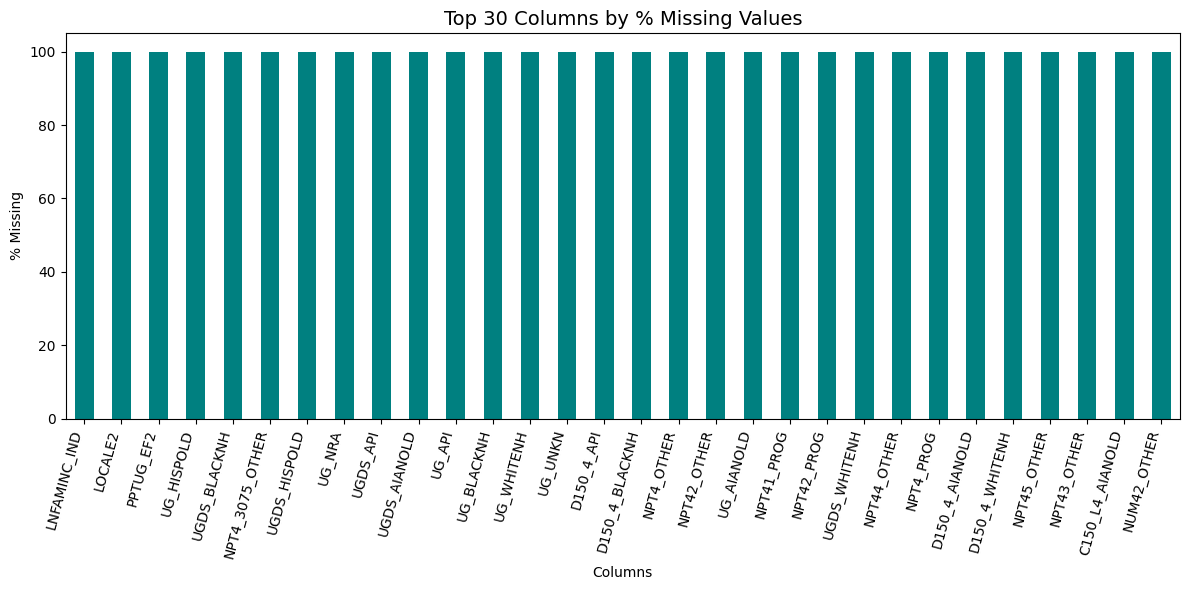

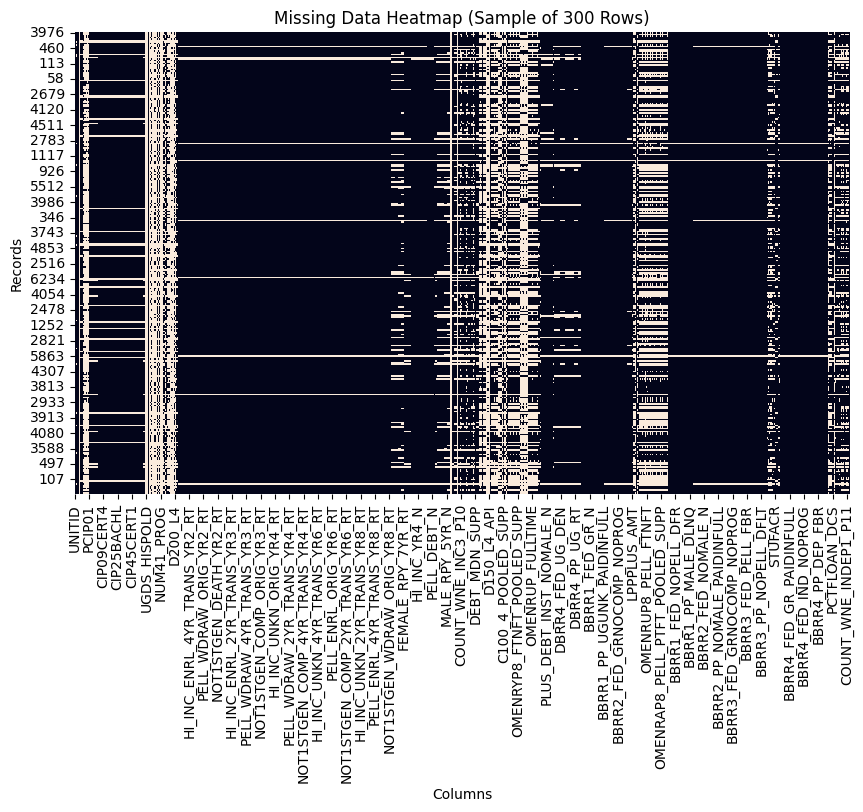

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# 1️⃣ Missingness by column (%)
# -------------------------------
missing_percent = df.isna().mean().round(3) * 100
missing_percent = missing_percent.sort_values(ascending=False)

print("🔍 Missingness summary (top 20 columns):\n")
print(missing_percent.head(20))

# -------------------------------
# 2️⃣ Bar chart of missingness
# -------------------------------
plt.figure(figsize=(12, 6))
missing_percent.head(30).plot(kind='bar', color='teal')
plt.title("Top 30 Columns by % Missing Values", fontsize=14)
plt.ylabel("% Missing")
plt.xlabel("Columns")
plt.xticks(rotation=75, ha='right')
plt.tight_layout()
plt.show()

# -------------------------------
# 3️⃣ Heatmap of missingness (sample)
# -------------------------------
sample = df.sample(300)  # smaller subset to keep visualization fast
plt.figure(figsize=(10, 6))
sns.heatmap(sample.isna(), cbar=False)
plt.title("Missing Data Heatmap (Sample of 300 Rows)")
plt.xlabel("Columns")
plt.ylabel("Records")
plt.show()
